<a href="https://colab.research.google.com/github/StevenChen0603/cs666student/blob/main/CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

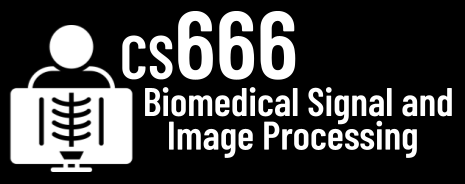
#Assignment 5

In [105]:
# NAME: Peng-Lin Chen

In [106]:
# In this assignment, we will visualize and explore a CT scan!

In [107]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [108]:
# we are using pydicom, so lets install it!
!pip install pydicom

**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [109]:
# Use wget to download https://cs666.org/data/ct.zip!
# This is a CT scan of an arm in DICOM format.


In [110]:
# TODO: YOUR CODE
!wget https://cs666.org/data/ct.zip

--2024-04-16 02:54:18--  https://cs666.org/data/ct.zip
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5847706 (5.6M) [application/zip]
Saving to: ‘ct.zip.1’

ct.zip.1            100%[===================>]   5.58M  --.-KB/s    in 0.08s   

2024-04-16 02:54:18 (69.1 MB/s) - ‘ct.zip.1’ saved [5847706/5847706]



In [111]:
# Then use the following snippet to extract the data.

In [112]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [113]:
# 1) Let's explore the data using the Files panel on the left.
# TODO: How many slices are there?

In [114]:
# TODO: YOUR_ANSWER
# Answer: There are 220 slices.

In [115]:
# 2) Let's visualize the data with SliceDrop!
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [116]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

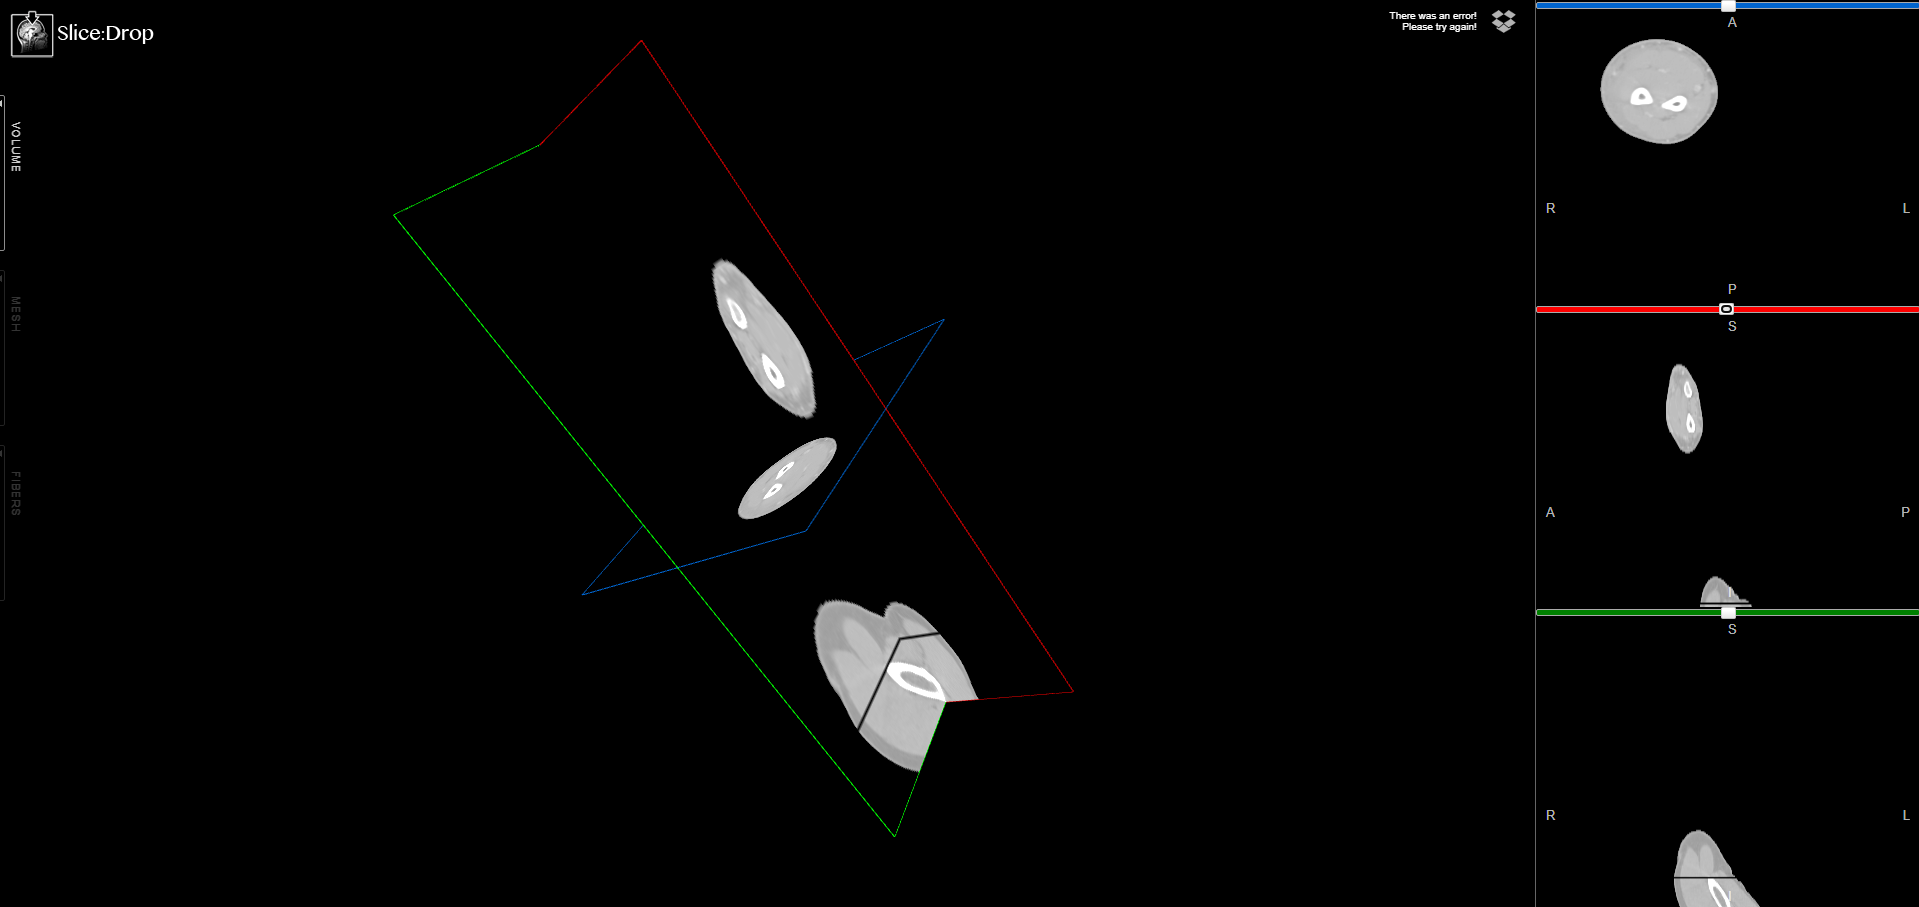

In [117]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [118]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click.

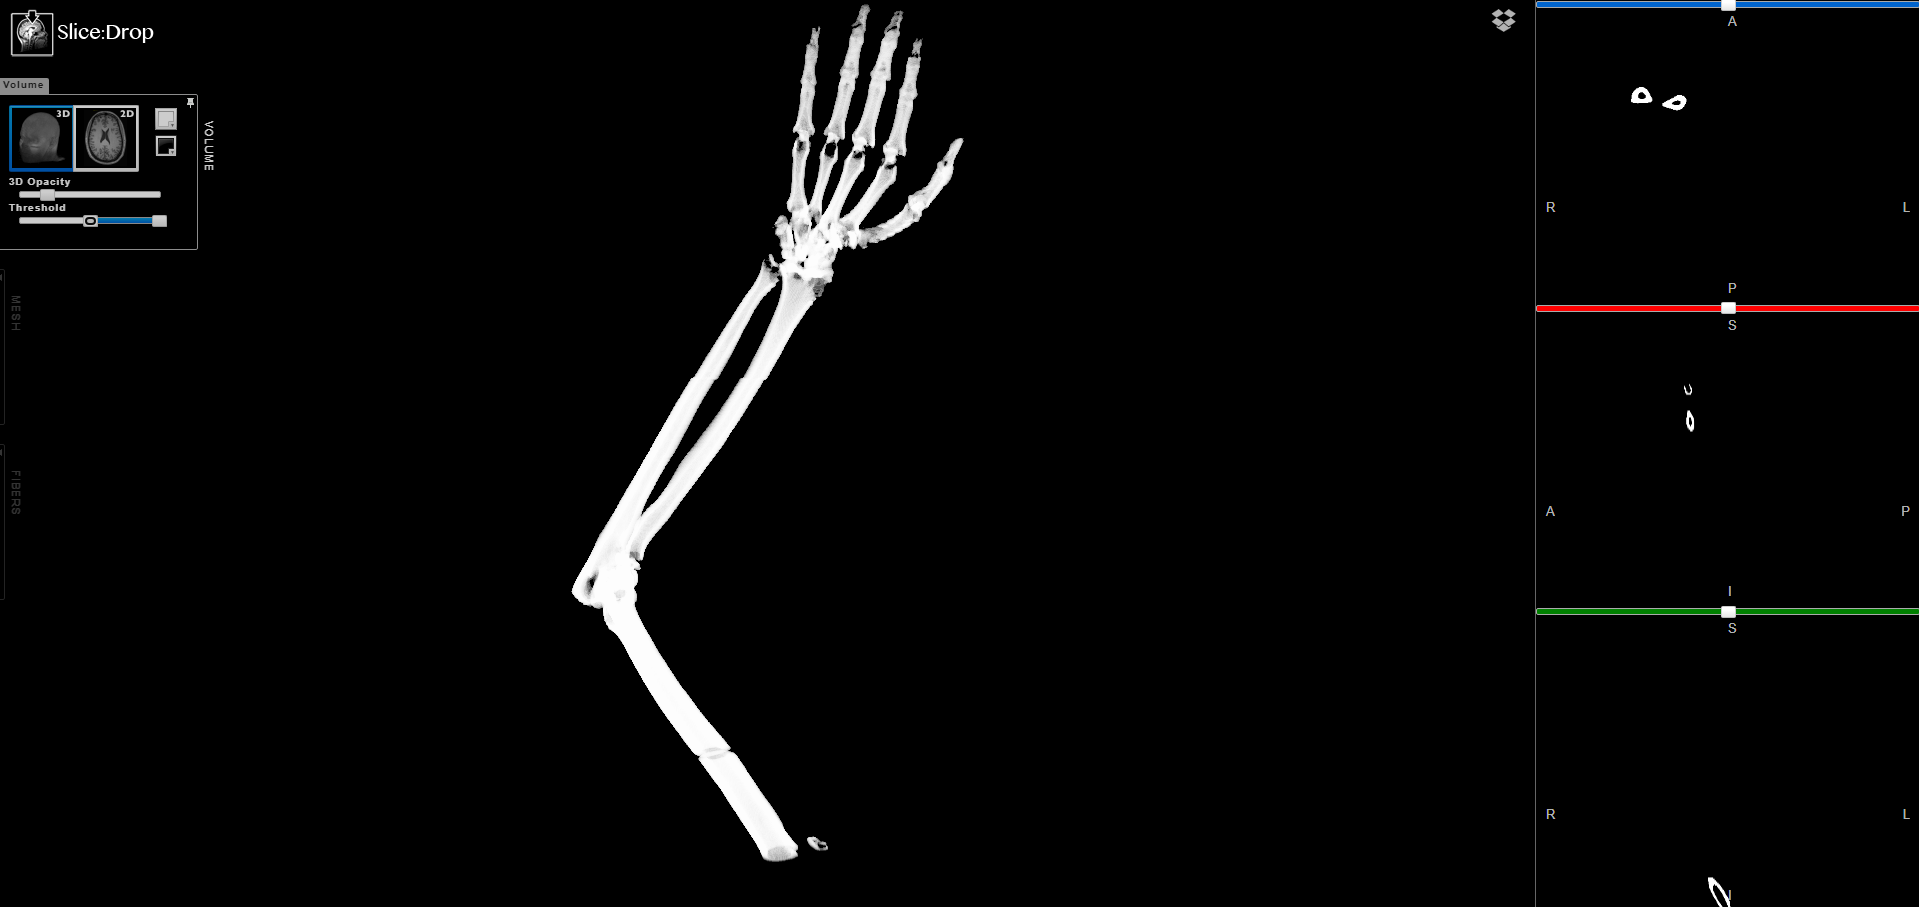

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [119]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [120]:
from pydicom import dcmread

In [121]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import os
import numpy as np

dir_path = "ct"
file_list = os.listdir(dir_path)
file_list.sort()

first_file = dcmread(os.path.join(dir_path, file_list[0]))
rows = int(first_file.Rows)
columns = int(first_file.Columns)
num_slices = len(file_list)

ct_volume = np.zeros((rows, columns, num_slices), dtype=np.uint16)

for i, file_name in enumerate(file_list):
    file_path = os.path.join(dir_path, file_name)
    dicom_data = dcmread(file_path)
    ct_volume[:, :, i] = dicom_data.pixel_array

In [122]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

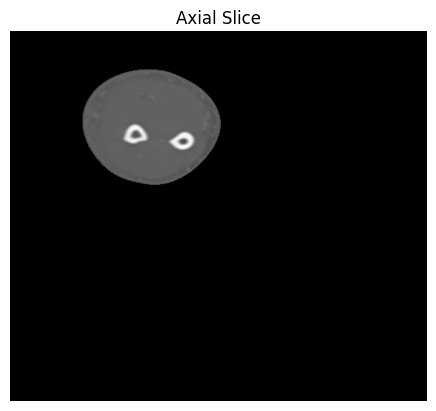

In [123]:
# TODO: YOUR CODE FOR AXIAL
plt.imshow(ct_volume[:, :, 100], cmap='gray')
plt.title("Axial Slice")
plt.axis('off')
plt.show()

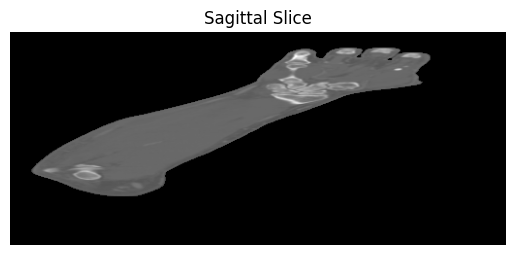

In [124]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(ct_volume[100, :, :].T, cmap='gray')
plt.title("Sagittal Slice")
plt.axis('off')
plt.show()

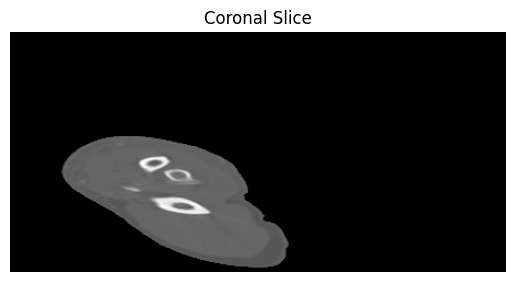

In [125]:
# TODO: YOUR CODE FOR CORONAL
plt.imshow(ct_volume[:, 100, :].T, cmap='gray')
plt.title("Coronal Slice")
plt.axis('off')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [126]:
# We will now enhance the visualization from above by performing
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [127]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

Window Center: 30
Window Width: 410
Rescale Intercept: -1024


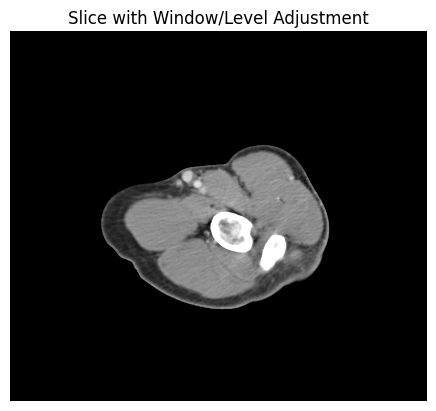

In [128]:
# TODO: YOUR CODE
# Extract window center, window width, and rescale intercept values
window_center = dicom_data[(0x0028, 0x1050)].value
window_width = dicom_data[(0x0028, 0x1051)].value
rescale_intercept = dicom_data[(0x0028, 0x1052)].value

# Print window center, window width, and rescale intercept values
print("Window Center:", window_center)
print("Window Width:", window_width)
print("Rescale Intercept:", rescale_intercept)

# Load pixel data and perform window/level adjustment
hu_pixels = dicom_data.pixel_array.astype(float) * dicom_data.RescaleSlope + rescale_intercept
vmin = window_center - window_width / 2
vmax = window_center + window_width / 2

# Display slice with window/level adjustment
plt.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)
plt.title("Slice with Window/Level Adjustment")
plt.axis('off')
plt.show()

In [129]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

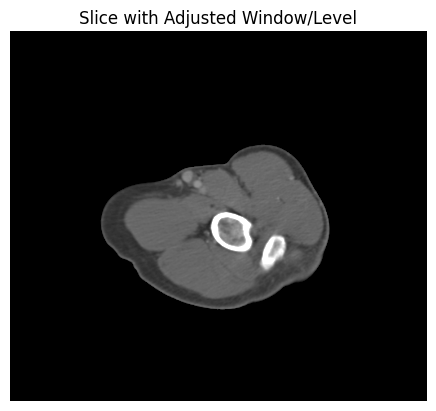

New Window Center: 130.0
New Window Width: 810.0


In [130]:
# TODO: YOUR CODE
# Load pixel data and perform window/level adjustment
hu_pixels = dicom_data.pixel_array.astype(float) * dicom_data.RescaleSlope + rescale_intercept

# Try different window/level values to enhance visualization
window_center_new = window_center + 100
window_width_new = window_width + 400

vmin = window_center_new - window_width_new / 2
vmax = window_center_new + window_width_new / 2

# Display slice with adjusted window/level
plt.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)
plt.title("Slice with Adjusted Window/Level")
plt.axis('off')
plt.show()

# Print the new window center and window width values
print("New Window Center:", window_center_new)
print("New Window Width:", window_width_new)

In [131]:
# Which values make sense and why?

In [140]:
# TODO: YOUR ANSWER
# Answer: 100 and 400 are the best because we can see the different types of tissues very clear and fliter some noise out.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [133]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

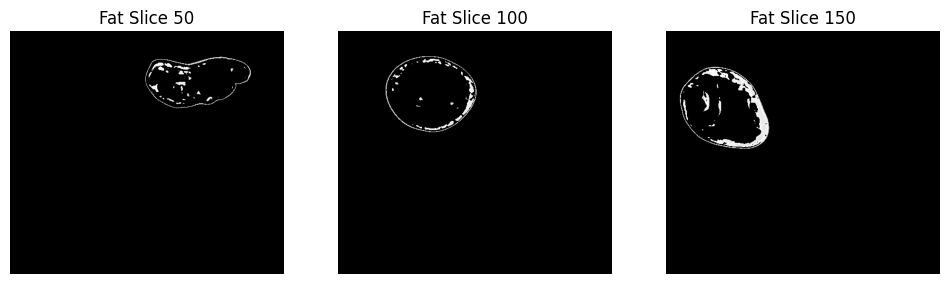

In [134]:
# TODO: YOUR CODE TO SEGMENT FAT

fat_threshold = (300, 1000)

# Create segmentation masks for fat, soft tissue, and bones
fat_mask = ct_volume.copy()
fat_mask[fat_mask < fat_threshold[0]] = 0
fat_mask[fat_mask > fat_threshold[1]] = 0
fat_mask = fat_mask.astype(np.int16)

# Visualize slices for each structure
slice_indices = [50, 100, 150]  # Slice indices to visualize

# Fat segmentation
plt.figure(figsize=(12, 4))
for i, slice_index in enumerate(slice_indices):
    plt.subplot(1, len(slice_indices), i + 1)
    plt.imshow(fat_mask[:, :, slice_index], cmap='gray')
    plt.title("Fat Slice {}".format(slice_index))
    plt.axis('off')
plt.show()

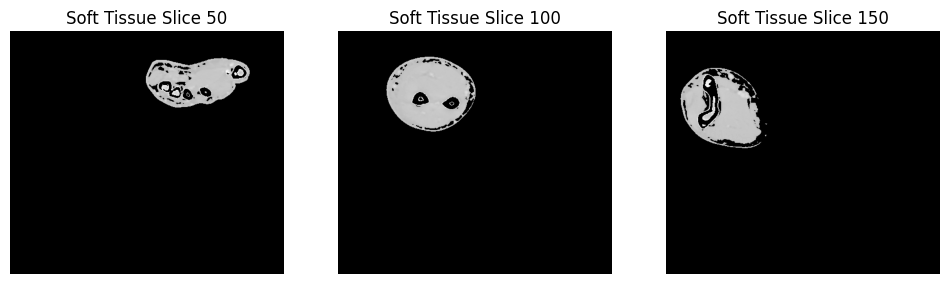

In [135]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

soft_tissue_threshold = (1000, 1400)

soft_tissue_mask = ct_volume.copy()
soft_tissue_mask[soft_tissue_mask < soft_tissue_threshold[0]] = 0
soft_tissue_mask[soft_tissue_mask > soft_tissue_threshold[1]] = 0
soft_tissue_mask = soft_tissue_mask.astype(np.int16)

plt.figure(figsize=(12, 4))
for i, slice_index in enumerate(slice_indices):
    plt.subplot(1, len(slice_indices), i + 1)
    plt.imshow(soft_tissue_mask[:, :, slice_index], cmap='gray')
    plt.title("Soft Tissue Slice {}".format(slice_index))
    plt.axis('off')
plt.show()

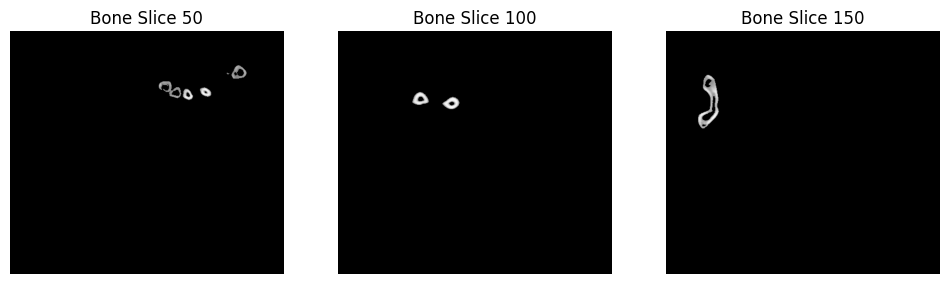

In [136]:
# TODO: YOUR CODE TO SEGMENT BONES

bone_threshold = 1400

bone_mask = ct_volume.copy()
bone_mask[bone_mask < bone_threshold] = 0
bone_mask = bone_mask.astype(np.int16)

plt.figure(figsize=(12, 4))
for i, slice_index in enumerate(slice_indices):
    plt.subplot(1, len(slice_indices), i + 1)
    plt.imshow(bone_mask[:, :, slice_index], cmap='gray')
    plt.title("Bone Slice {}".format(slice_index))
    plt.axis('off')
plt.show()

In [137]:
# Are the segmentations good?

In [138]:
# TODO: YOUR ANSWER
# Yes, the segmentaions are good!

In [139]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""